# 1. Recreate graphs


The following graphs below are created from [this dataset](https://data.world/makeovermonday/2025w3-steam-top-100-played-games). Try to recreate them as close as possible

&nbsp; a) Here we use subplots to get two axes in one figure

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/popular_games.png?raw=true" alt="bar chart and line chart" width="800">

&nbsp; b) This one will require some data processing to be able to come to this point.

Hint: df.explode() and df.join()

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/top5_genre_tags.png?raw=true" alt="bar chart and line chart" width="800">

&nbsp; c) A df has a hist() method for creating histogram

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/histogram_tags.png?raw=true" alt="bar chart and line chart" width="500">


In [344]:
import pandas as pd

df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")


In [345]:
df_pop_game = df.sort_values(by= "Rank", ascending=True).head(10)

In [346]:
df_pop_game

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
5,6,Grand Theft Auto V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/271590/Gran...,£14.80,"207,117","207,117","Open World, Action, Multiplayer, Crime, Mature"
6,7,NARAKA: BLADEPOINT,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1203220/NAR...,Free To Play,"201,876","208,643","Battle Royale, Multiplayer, Martial Arts, PvP,..."
7,8,Rust,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/252490/Rust...,£34.99,"168,002","205,358","Survival, Crafting, Multiplayer, Open World, O..."
8,9,Palworld,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1623730/Pal...,£24.99,"165,613","165,613","Open World, Survival, Creature Collector, Mult..."
9,10,Apex Legends™,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1172470/Ape...,Free To Play,"150,754","151,447","Free to Play, Battle Royale, Multiplayer, FPS,..."


In [347]:
df_pop_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             10 non-null     int64 
 1   Name             10 non-null     object
 2   Thumbnail URL    10 non-null     object
 3   Store Link       10 non-null     object
 4   Price            10 non-null     object
 5   Current Players  10 non-null     object
 6   Peak Today       10 non-null     object
 7   Genre Tags       10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


In [348]:
columns = df_pop_game[["Current Players", "Peak Today"]]

for column in columns:

    df_pop_game[column] = df_pop_game[column].str.replace(",", "").astype(int)


In [349]:
df_pop_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             10 non-null     int64 
 1   Name             10 non-null     object
 2   Thumbnail URL    10 non-null     object
 3   Store Link       10 non-null     object
 4   Price            10 non-null     object
 5   Current Players  10 non-null     int64 
 6   Peak Today       10 non-null     int64 
 7   Genre Tags       10 non-null     object
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


<Axes: xlabel='Name'>

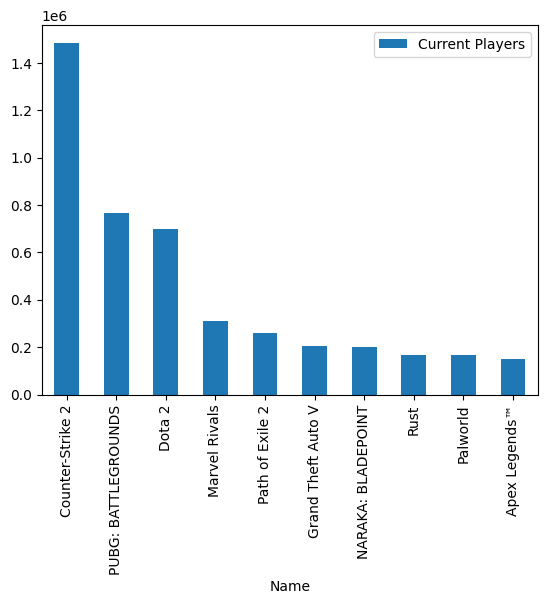

In [350]:
df_pop_game.plot(kind= "bar", x= "Name", y= "Current Players")

In [351]:
df_pop_game["Price"] = df_pop_game["Price"].replace({"Free To Play": "0", "£": ""}, regex=True)

In [352]:
df_pop_game = df_pop_game.sort_values(by= "Price", ascending=True)

In [353]:
df_pop_game.set_index("Name", inplace=True)

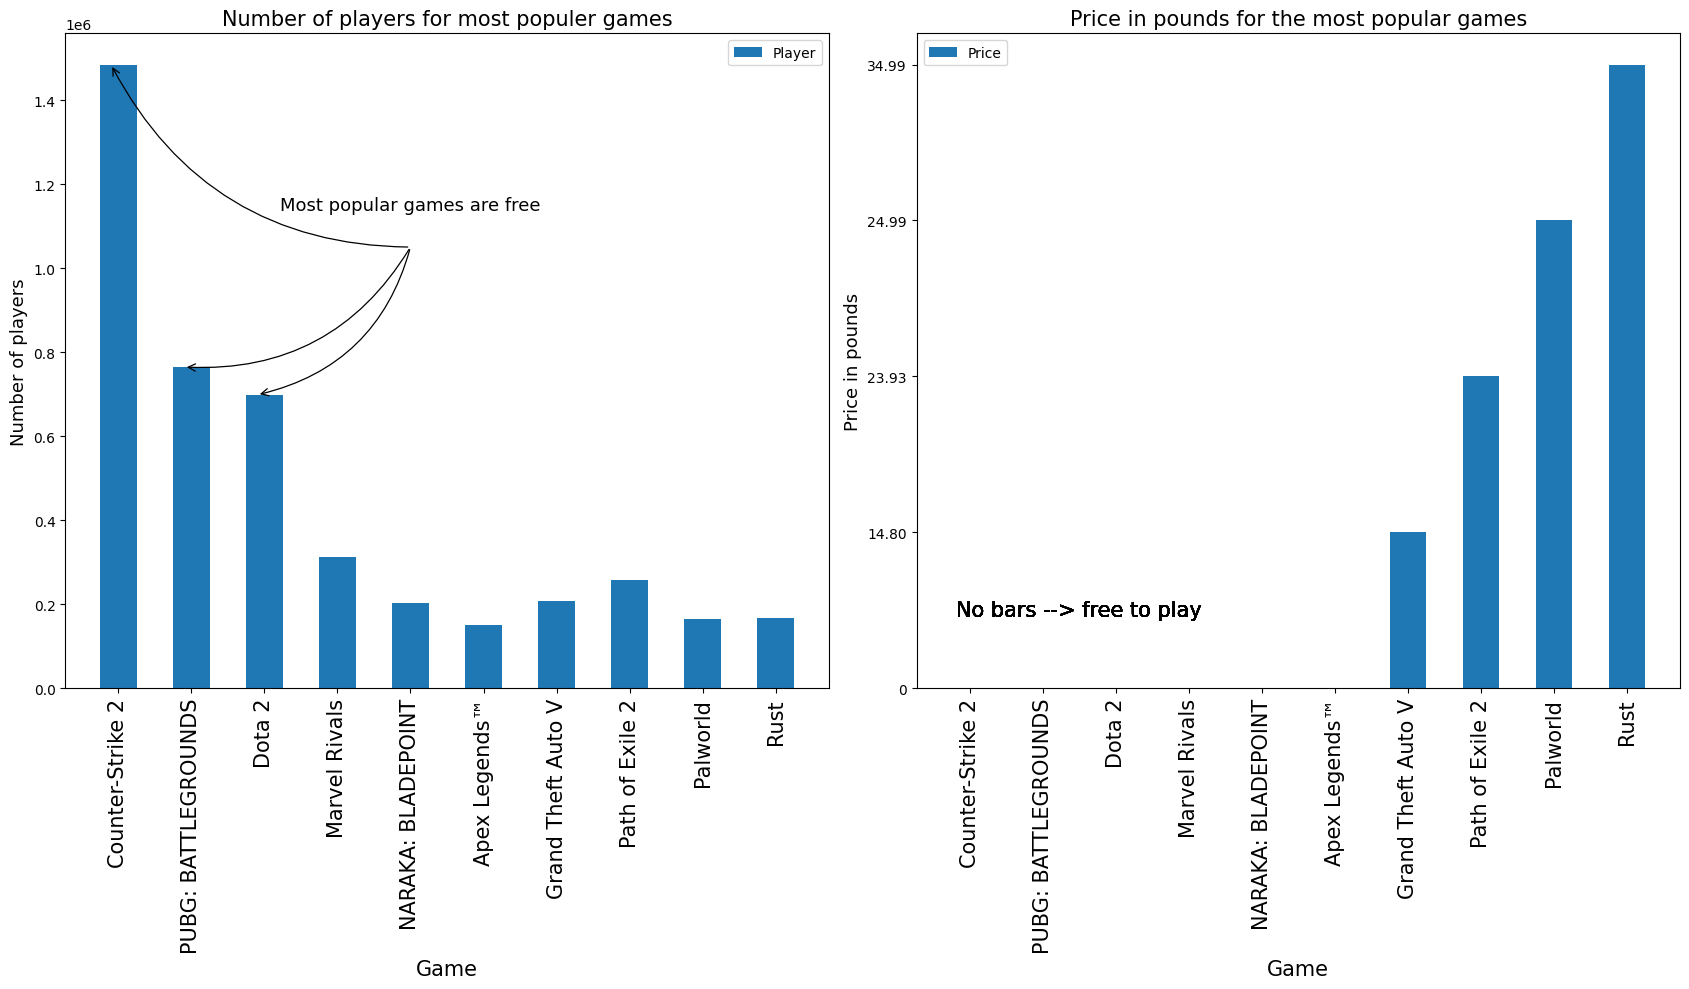

In [354]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize= (17,10))
# ax[0].bars(df_pop_game.index, df_pop_game["Current Players"], width= 0.5)
# ax[1].bars(df_pop_game.index, df_pop_game["Price"], width= 0.5)

bars = ax[0].bar(df_pop_game.index, df_pop_game["Current Players"], width= 0.5, label="Player")
bars_2 = ax[1].bar(df_pop_game.index, df_pop_game["Price"], width= 0.5, label= "Price")


ax[0].set_xticks(df_pop_game.index)
ax[0].set_xticklabels(df_pop_game.index.astype(str), rotation= 90, fontsize= 15)
ax[0].set_xlabel("Game", fontsize= 15)
ax[0].set_ylabel("Number of players", fontsize= 13)
ax[0].set_title("Number of players for most populer games", fontsize= 15)
ax[0].legend()





def most_play_game(x_offset= None, y_offset= None, rad=None, num_annotate= 5):
    
    
    text_x_pos = 4
    text_y_pos = df_pop_game["Current Players"].min() + 1000000
    
    ax[0].text(text_x_pos, text_y_pos, "Most popular games are free", fontsize= 13, ha= 'center', va= 'center')
    
    for i, bar in enumerate(bars[:num_annotate]):
        x_pos = bar.get_x() + bar.get_width()/2
        y_pos = bar.get_height()
    
    
        ax[0].annotate(text= "", fontsize= 13, 
                        xy= (x_pos + x_offset, y_pos + y_offset),
                        xytext= (text_x_pos, text_y_pos - 100000),
                        arrowprops= dict(arrowstyle= '->', linewidth= 0.9, connectionstyle= f"arc3, rad={rad}"))


# ax[0].annotate(text= text, fontsize= 13,
#                xy= (x_pos-7.5 , y_pos + 650000),
#                xytext= (x_pos- 6.0, y_pos + 1100000),
#                arrowprops= dict(arrowstyle= '->', linewidth= 0.9, connectionstyle= 'arc3, rad= 0.1'))


most_play_game(-0.1, 0, -0.3, num_annotate=3)


ax[1].set_xticks(df_pop_game.index)
ax[1].set_xticklabels(df_pop_game.index, rotation= 90, fontsize= 15)
ax[1].set_ylabel("Price in pounds", fontsize= 13)
ax[1].set_xlabel("Game", fontsize= 15)
ax[1].set_title("Price in pounds for the most popular games", fontsize= 15)
ax[1].legend(loc= "upper left")

for bar in bars_2:
    
    x_pos_2 = bars_2[0].get_x() + bars_2[0].get_width()/2
    y_pos_2 = bars_2[0].get_height() 
    
    ax[1].text(x_pos_2 + 1.5, y_pos_2 + 0.5, 'No bars --> free to play', fontsize = 15, ha= 'center', va= 'center')



fig.tight_layout()
fig.savefig("figures/free_game.png")
plt.show()


In [355]:
df["Genre Tags"] = df["Genre Tags"].str.split(", ")


In [356]:
explode_genre = df["Genre Tags"].explode() ## Om kolumnen har en lista så explode skapar en ny rad för varje element  


In [357]:
genre_counts = explode_genre.value_counts()

In [358]:
genre_counts.head()

Genre Tags
+               82
Multiplayer     71
Action          64
Singleplayer    55
Open World      45
Name: count, dtype: int64

In [359]:
print(genre_counts)

Genre Tags
+               82
Multiplayer     71
Action          64
Singleplayer    55
Open World      45
                ..
Old School       1
Score Attack     1
1980s            1
Assassin         1
Nostalgia        1
Name: count, Length: 254, dtype: int64


In [360]:
df_game_genre = genre_counts[1:]

In [361]:
df_game_genre =  df_game_genre.head()

In [362]:
df_game_genre

Genre Tags
Multiplayer     71
Action          64
Singleplayer    55
Open World      45
Co-op           42
Name: count, dtype: int64

In [363]:
df_game_genre = df_game_genre.reset_index()


In [364]:
df_game_genre.columns = ["Genre Tags", "Number"]

In [365]:
df_game_genre.set_index("Genre Tags", inplace= True)

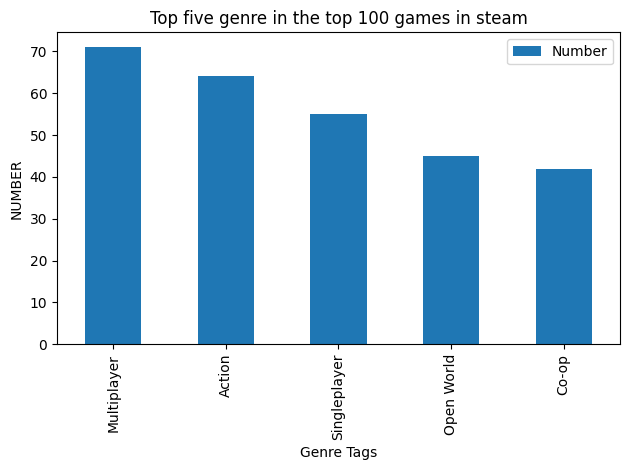

In [391]:
ax = df_game_genre.plot(kind= "bar")

ax.set_title("Top five genre in the top 100 games in steam")
ax.set_ylabel("NUMBER")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/top_5_genre_steam.png", dpi= 300)

In [367]:
df_tags = df[["Name", "Genre Tags"]]

In [368]:
df_tags["num_tags"] = df_tags["Genre Tags"].apply(len) ## använda apply med len för att räkna ut hur många element. apply är pandas egna funktion och len räknar hur många element

C:\Users\Marcus\AppData\Local\Temp\ipykernel_10352\3428322783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tags["num_tags"] = df_tags["Genre Tags"].apply(len) ## använda apply med len för att räkna ut hur många element. apply är pandas egna funktion och len räknar hur många element


In [369]:
df_num_tags = df_tags.drop(["Name", "Genre Tags"], axis=1)

In [370]:
df_tags = df_num_tags["num_tags"].sort_values(ascending=False).reset_index()

In [373]:
df_tags.columns = ["num_tags", "total_tags"]

In [374]:
df_tags

,num_tags,total_tags
0,0,21
1,1,21
2,2,21
3,3,21
4,4,21
...,...,...
95,58,4
96,83,4
97,48,3
98,68,3


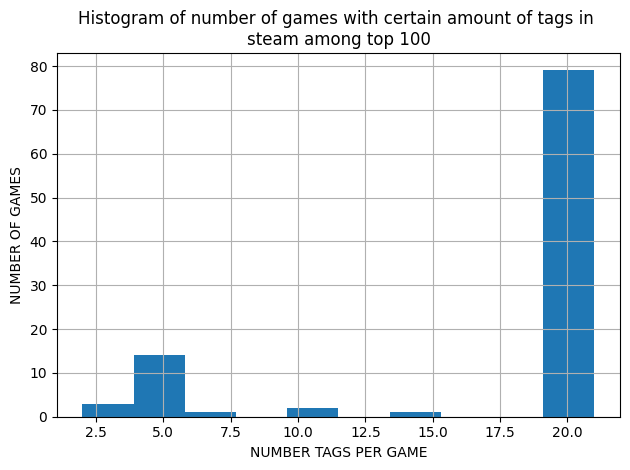

In [390]:
ax = df_tags["total_tags"].plot(kind= "hist")
ax.grid(True)

ax.set_title("Histogram of number of games with certain amount of tags in \nsteam among top 100")
ax.set_ylabel("NUMBER OF GAMES")
ax.set_xlabel("NUMBER TAGS PER GAME")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/amount_tags_per_games.png", dpi= 300)